Dataset from Kaggle : The "Music Genre Classification"
Source: https://www.kaggle.com/datasets/purumalgi/music-genre-classification/

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 
musicdata = pd.read_csv('train.csv')
musicdata.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [2]:
print("Data type : ", type(musicdata))
print("Data dims : ", musicdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17996, 17)


In [3]:
print(musicdata.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


In [4]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

There are `17` variables/columns and `17996` rows in the dataset.
The response varibale seems  to be `Popularity`, while the remaining `16` variables are most likely predictors.
The following columns seems to be Numeric:
- Popularity
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_in min/ms

Meanwhile, these columns seems to be Categorical:
- Artist Name
- Track Name
- key
- mode
- time_signature
- Class

# Exploratory Data Analysis

<Axes: >

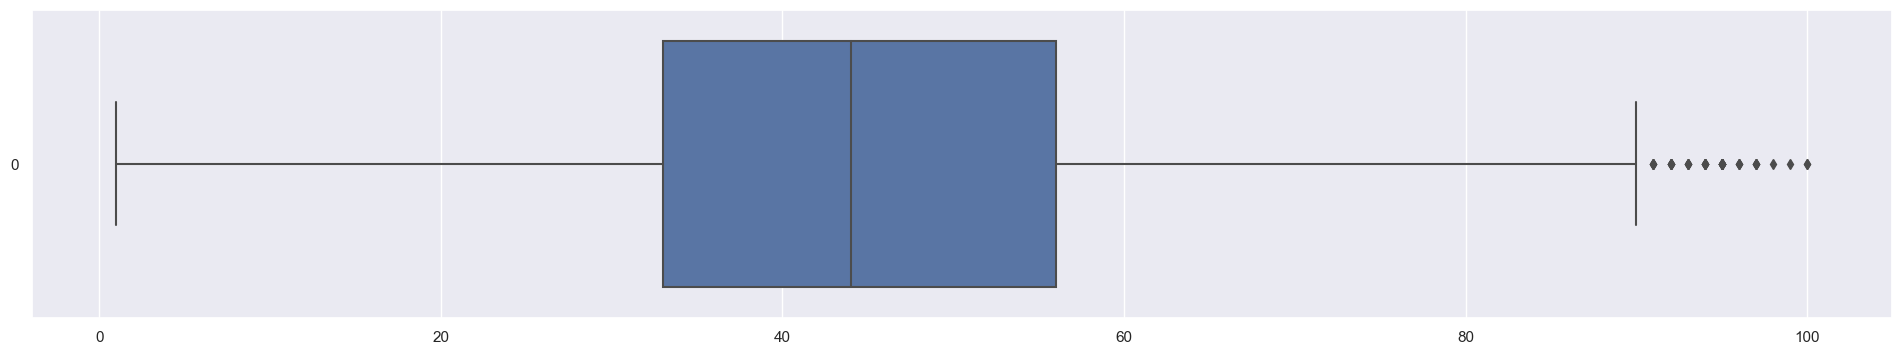

In [5]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = musicdata['Popularity'], orient = "h")

<Axes: xlabel='Popularity', ylabel='Count'>

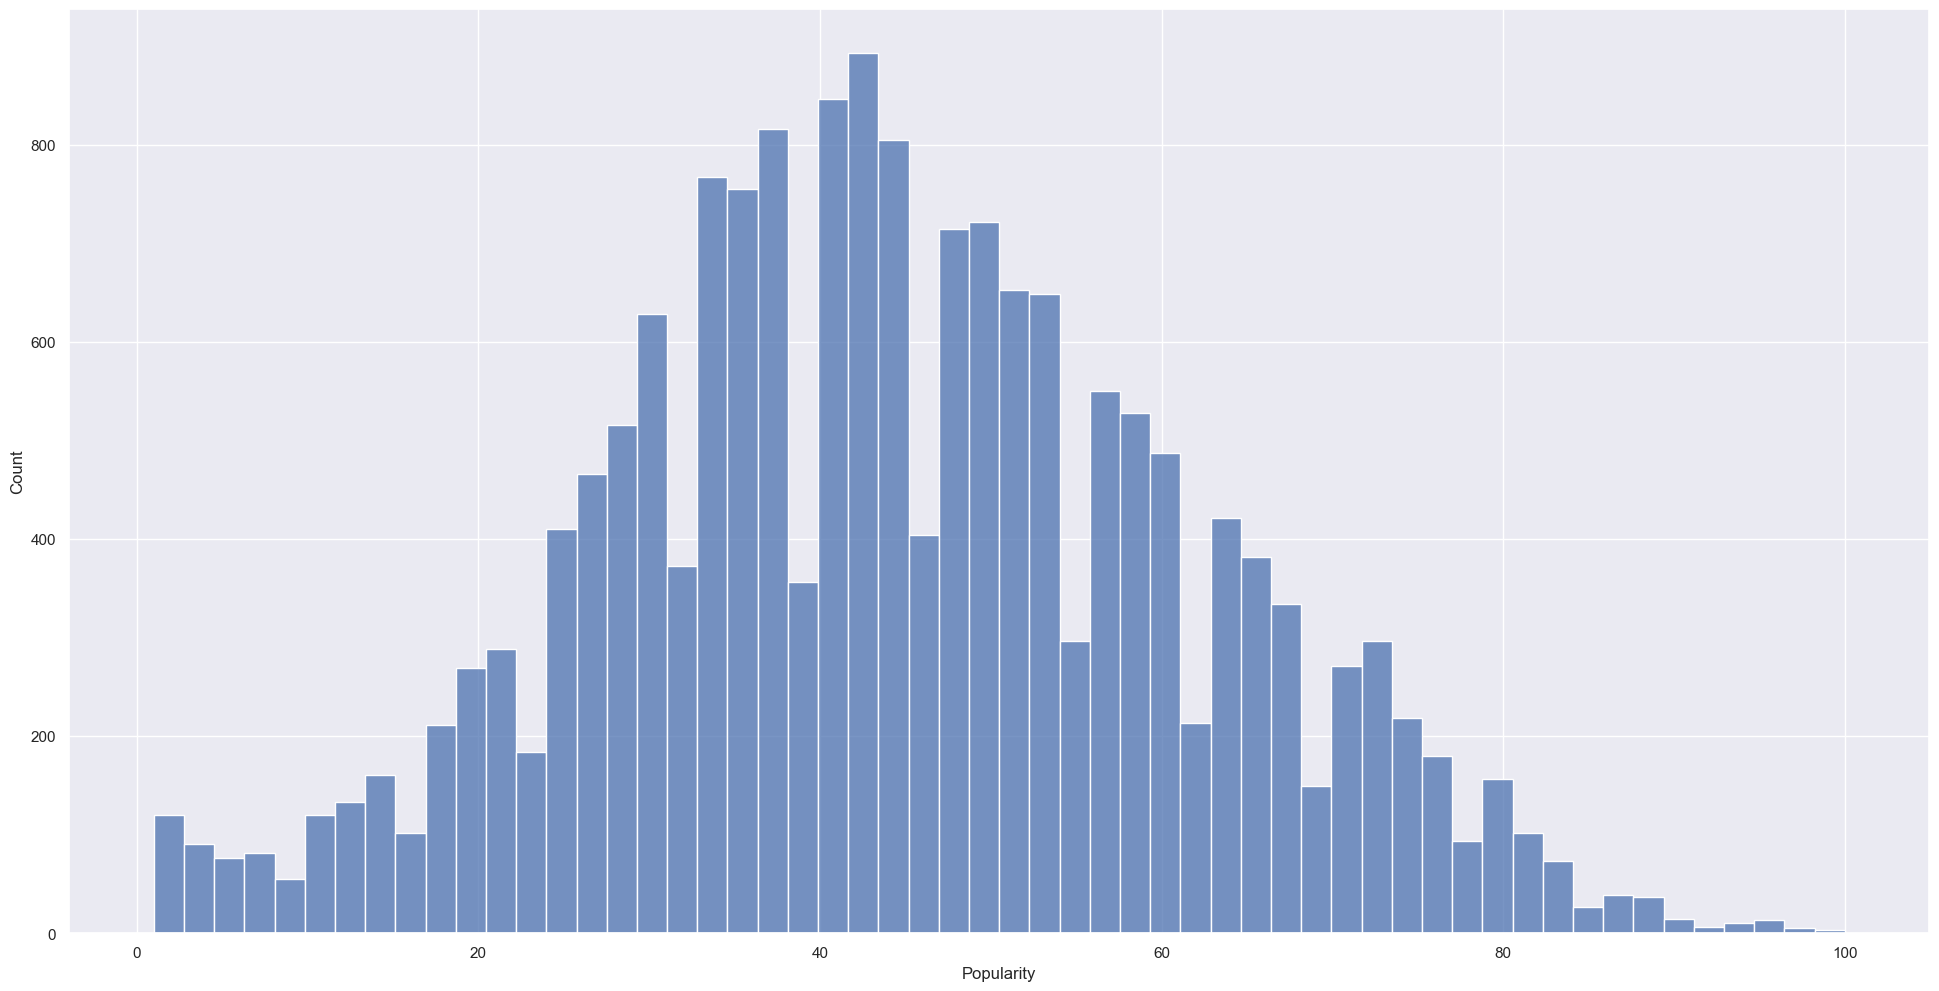

In [6]:
f = plt.figure(figsize=(24, 12))
sb.histplot(data = musicdata['Popularity'])

<Axes: >

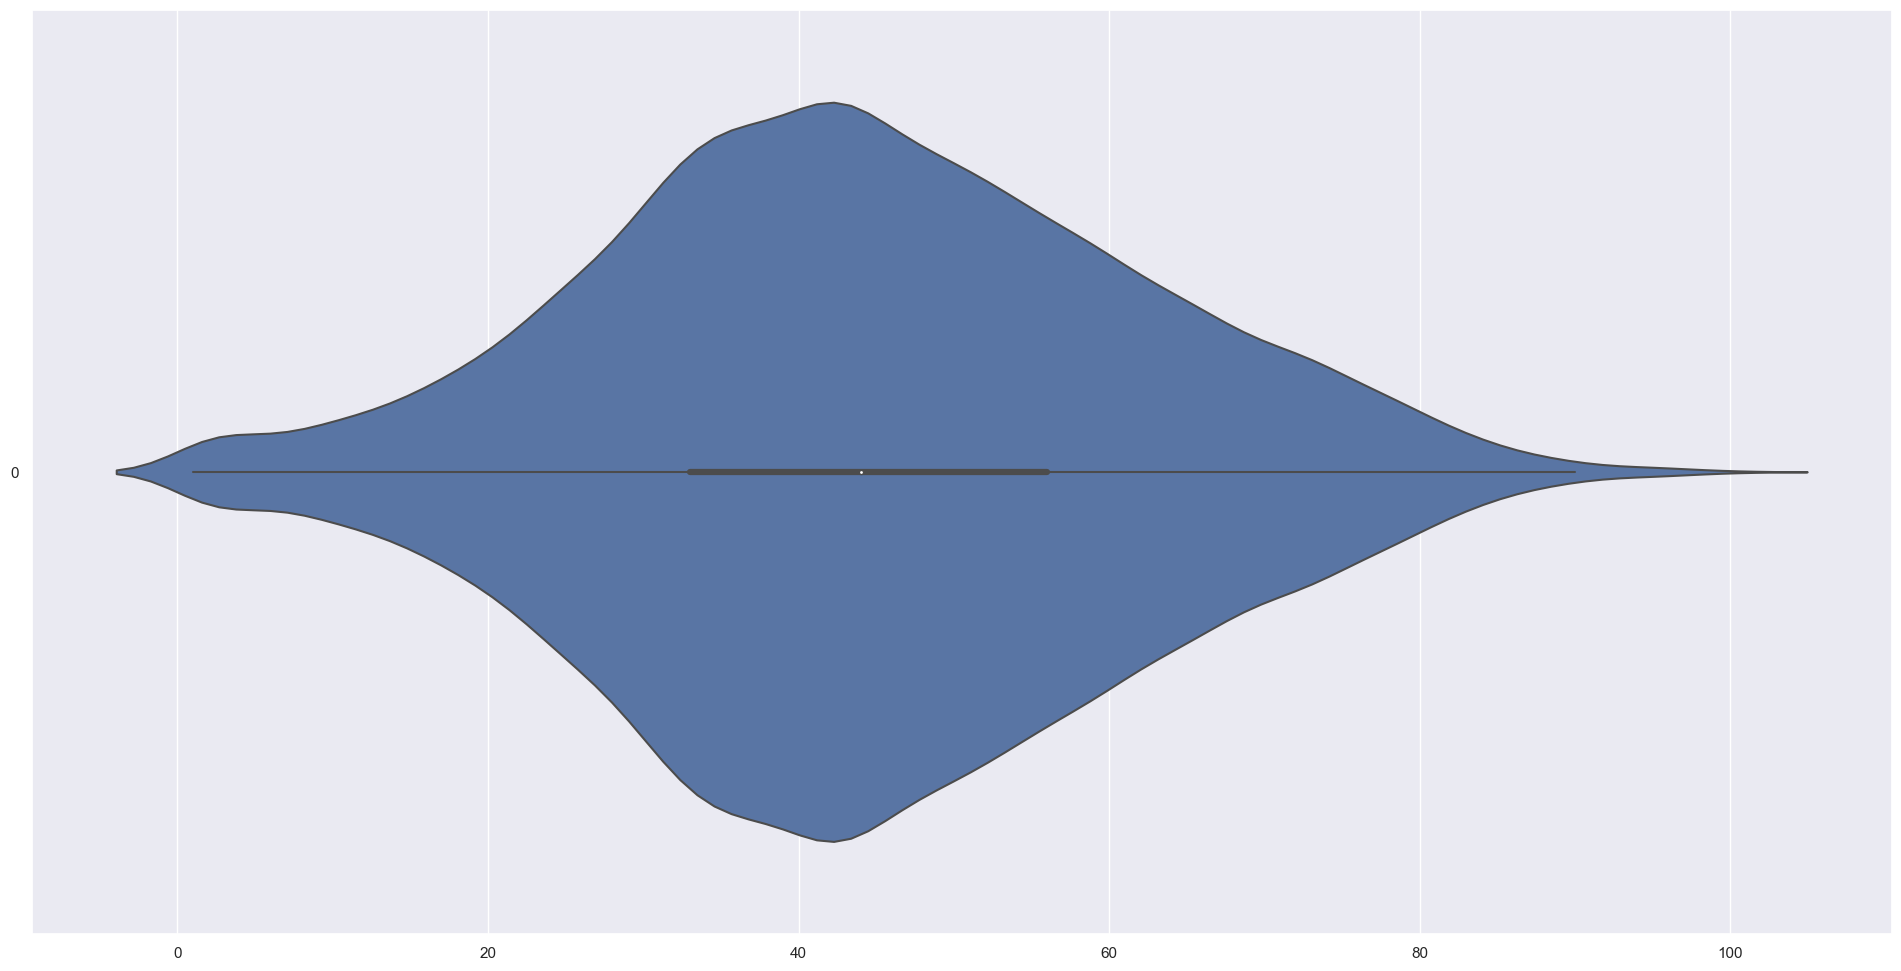

In [7]:
f = plt.figure(figsize=(24, 12))
sb.violinplot(data = musicdata['Popularity'], orient = "h")

In [8]:
# Categorical Predictors
musicdata[['Artist Name']].describe()

,Artist Name
count,17996
unique,9149
top,Backstreet Boys
freq,69


In [9]:
test = musicdata[['Artist Name']].value_counts();
test.head(20)

Artist Name       
Backstreet Boys       69
Westlife              60
Britney Spears        54
Eyal Golan            48
Omer Adam             48
Shlomo Artzi          39
The Rolling Stones    38
Arik Einstein         35
Itay Levi             35
Moshe Peretz          34
Dudu Aharon           34
Hadag Nahash          33
Yehudit Ravitz        31
U2                    30
Lata Mangeshkar       28
Metallica             27
AC/DC                 27
Dudu Tassa            26
Sarit Hadad           26
The Beatles           25
Name: count, dtype: int64

In [10]:
mapping_class = {0: 'Acoustic/Folk', 1: 'Alternative', 2: 'Blues', 3: 'Bollywood', 4: 'Country',5: 'HipHop', 6: 'Indie Alternative', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock'}
musicdata_class = pd.DataFrame(musicdata['Class'].map(mapping_class))
musicdata_class.describe()

,Class
count,17996
unique,11
top,Rock
freq,4949


In [11]:
numeric_musicdata = pd.DataFrame(musicdata[['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']])
numeric_musicdata.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence
count,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000
mean,0.543433,0.662777,0.079707,0.177562,0.196170,0.486208
std,0.166268,0.235373,0.083576,0.304048,0.159212,0.240195
min,0.059600,0.000020,0.022500,0.000001,0.011900,0.018300
25%,0.432000,0.509000,0.034800,0.000089,0.097500,0.297000
50%,0.545000,0.700000,0.047400,0.003910,0.129000,0.481000
75%,0.659000,0.860000,0.083000,0.200000,0.258000,0.672000
max,0.989000,1.000000,0.955000,0.996000,1.000000,0.986000


<Axes: >

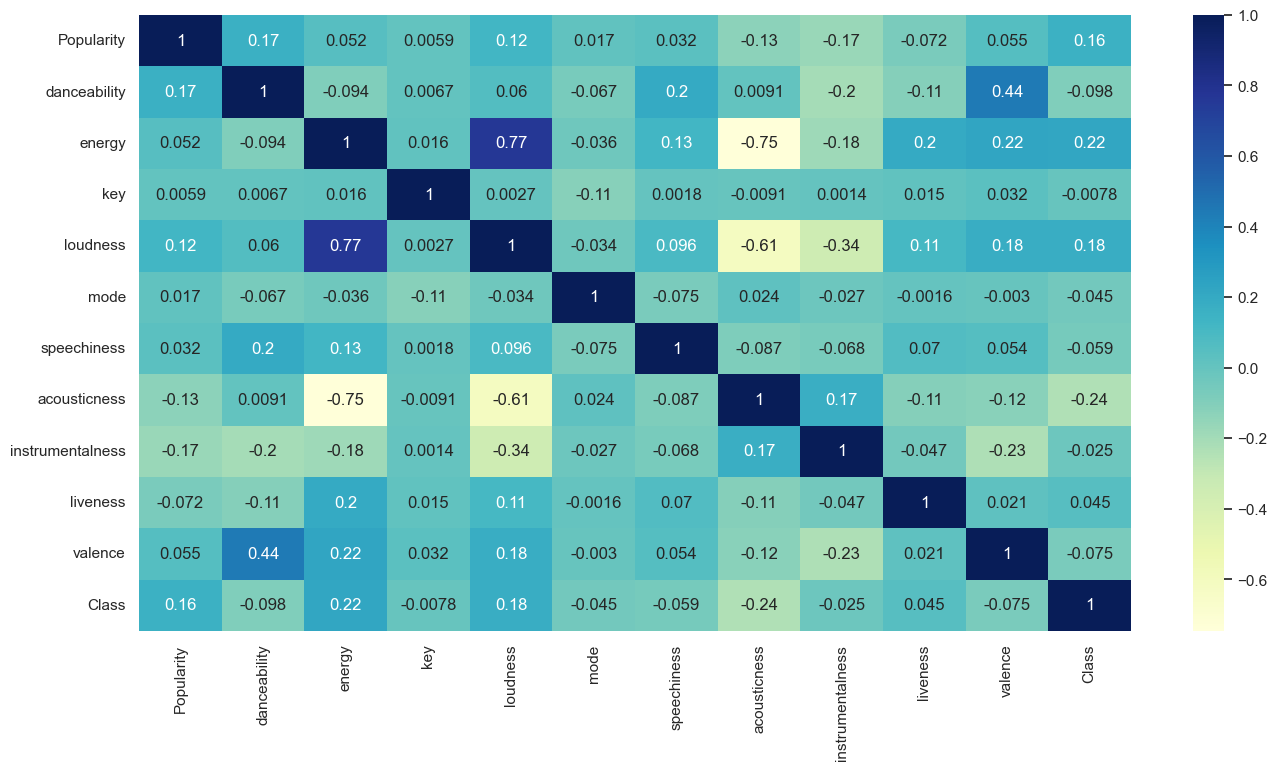

In [14]:
test = pd.DataFrame(musicdata[['Popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Class']])
plt.figure(figsize=(16, 8))
sb.set(style="whitegrid")
corr = test.corr()
sb.heatmap(corr,annot=True, cmap="YlGnBu")

In [15]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [20]:
mean_key = musicdata["key"].mean()
mean_key

5.952446502315104

In [21]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [22]:
musicdata["key"].fillna(mean_key,inplace=True)

In [23]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [25]:
mean_instrumental = musicdata["instrumentalness"].mean()
mean_instrumental

0.1775619253660327

In [27]:
mean_popular = musicdata["Popularity"].mean()
mean_popular

44.51212431693989

In [28]:
musicdata["instrumentalness"].fillna(mean_instrumental,inplace=True)
musicdata["Popularity"].fillna(mean_popular,inplace=True)

In [29]:
musicdata.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [57]:
# to find out the number of outliers in numeric variables
df=pd.DataFrame(musicdata[['Popularity', 'danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']])
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = len(data[(data>upper_bound) | (data<lower_bound)])
    print( f' {var: >15} number of outliers: {outlier: >5} ')
    #print( f' {var: >15} number of outliers: {outlier: >5} ')
    # Remove outliers from the DataFrame
    #cleaned_df = df.drop(outlier.index)
    # Write the cleaned DataFrame to a new CSV file
    #cleaned_df.to_csv('cleaned_file_new.csv', index=False)

      Popularity number of outliers:    41 
    danceability number of outliers:    31 
        loudness number of outliers:   818 
     speechiness number of outliers:  2034 
 instrumentalness number of outliers:  2590 
        liveness number of outliers:   956 
           tempo number of outliers:    36 


In [58]:
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = data[(data>upper_bound) | (data<lower_bound)]
    # Remove outliers from the DataFrame
    cleaned_df = df.drop(outlier.index)

      Popularity number of outliers:    41 
    danceability number of outliers:    31 
        loudness number of outliers:   818 
     speechiness number of outliers:  2034 
 instrumentalness number of outliers:  2590 
        liveness number of outliers:   956 
           tempo number of outliers:    36 


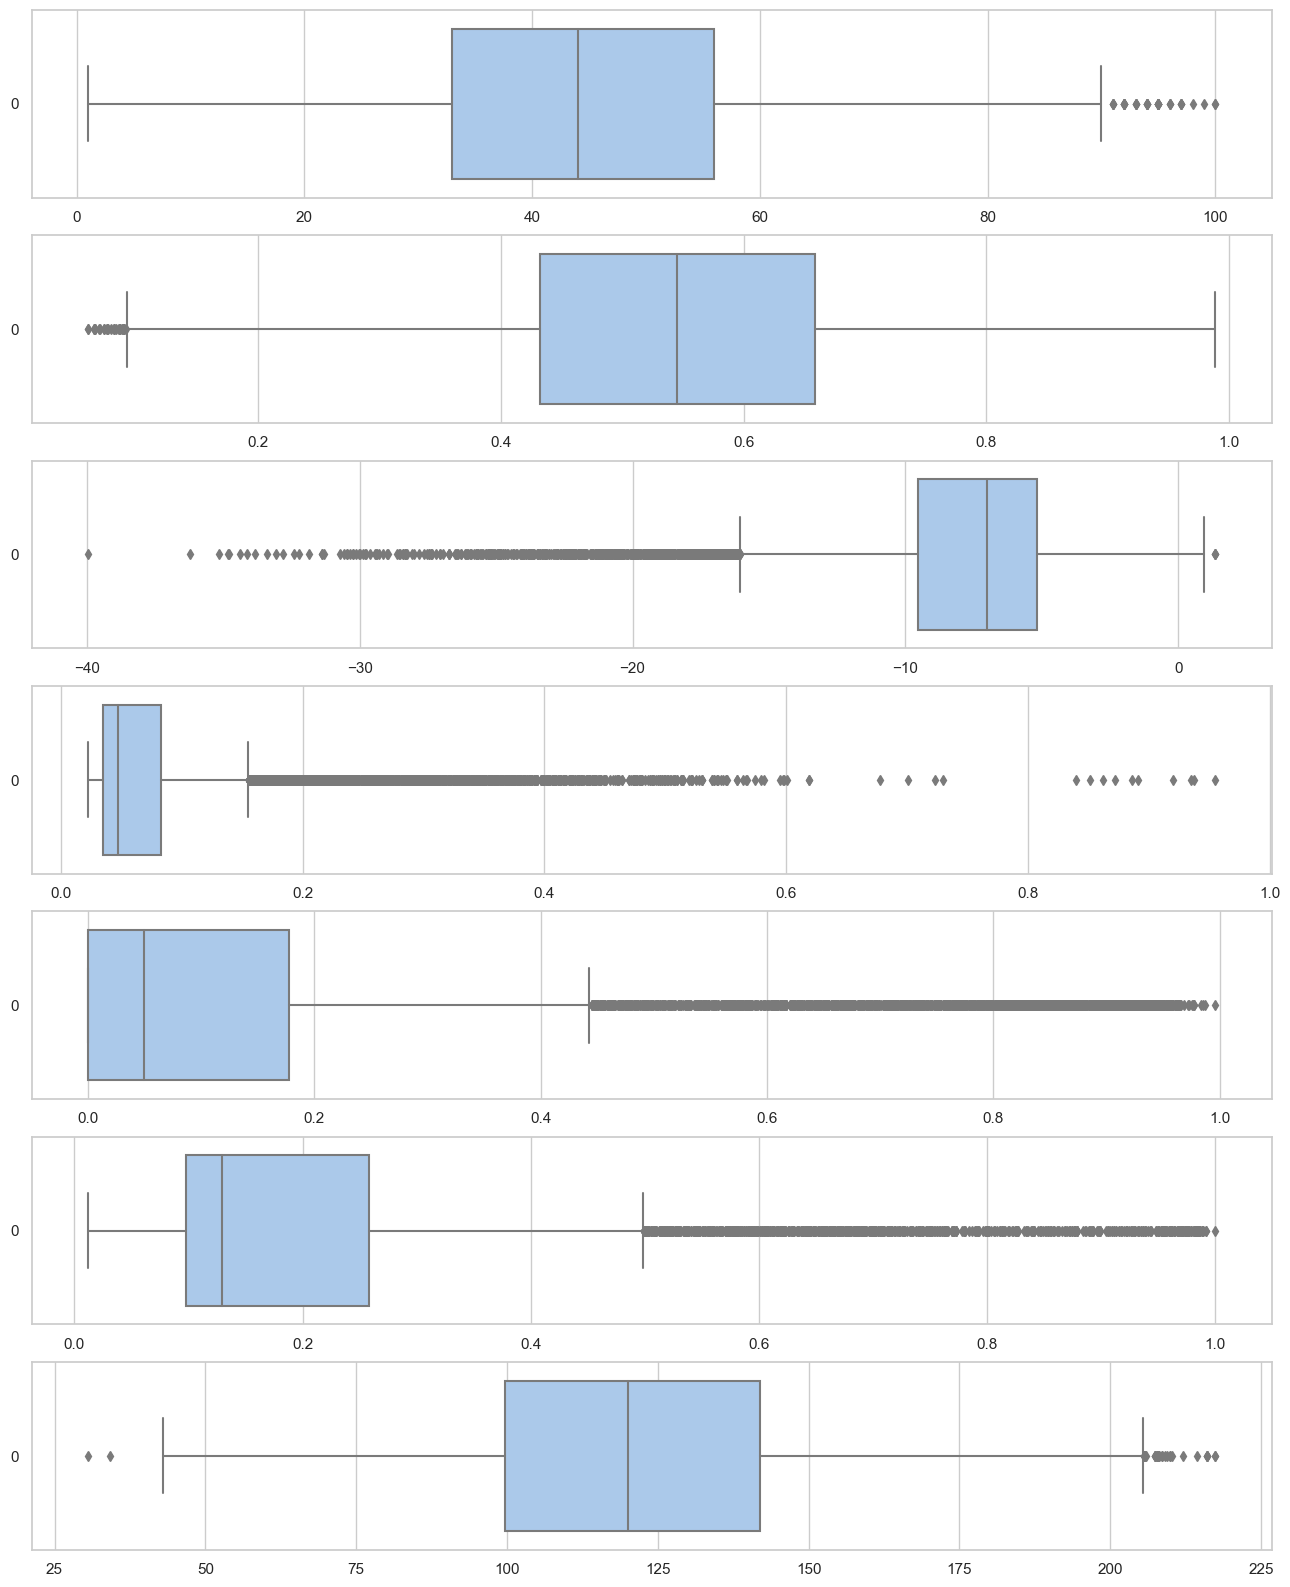

In [55]:
f, axes = plt.subplots(7, figsize=(16, 20))
 
count = 0
for var in df:
    sb.boxplot(data = df[var], orient = "h", ax = axes[count])
    count += 1

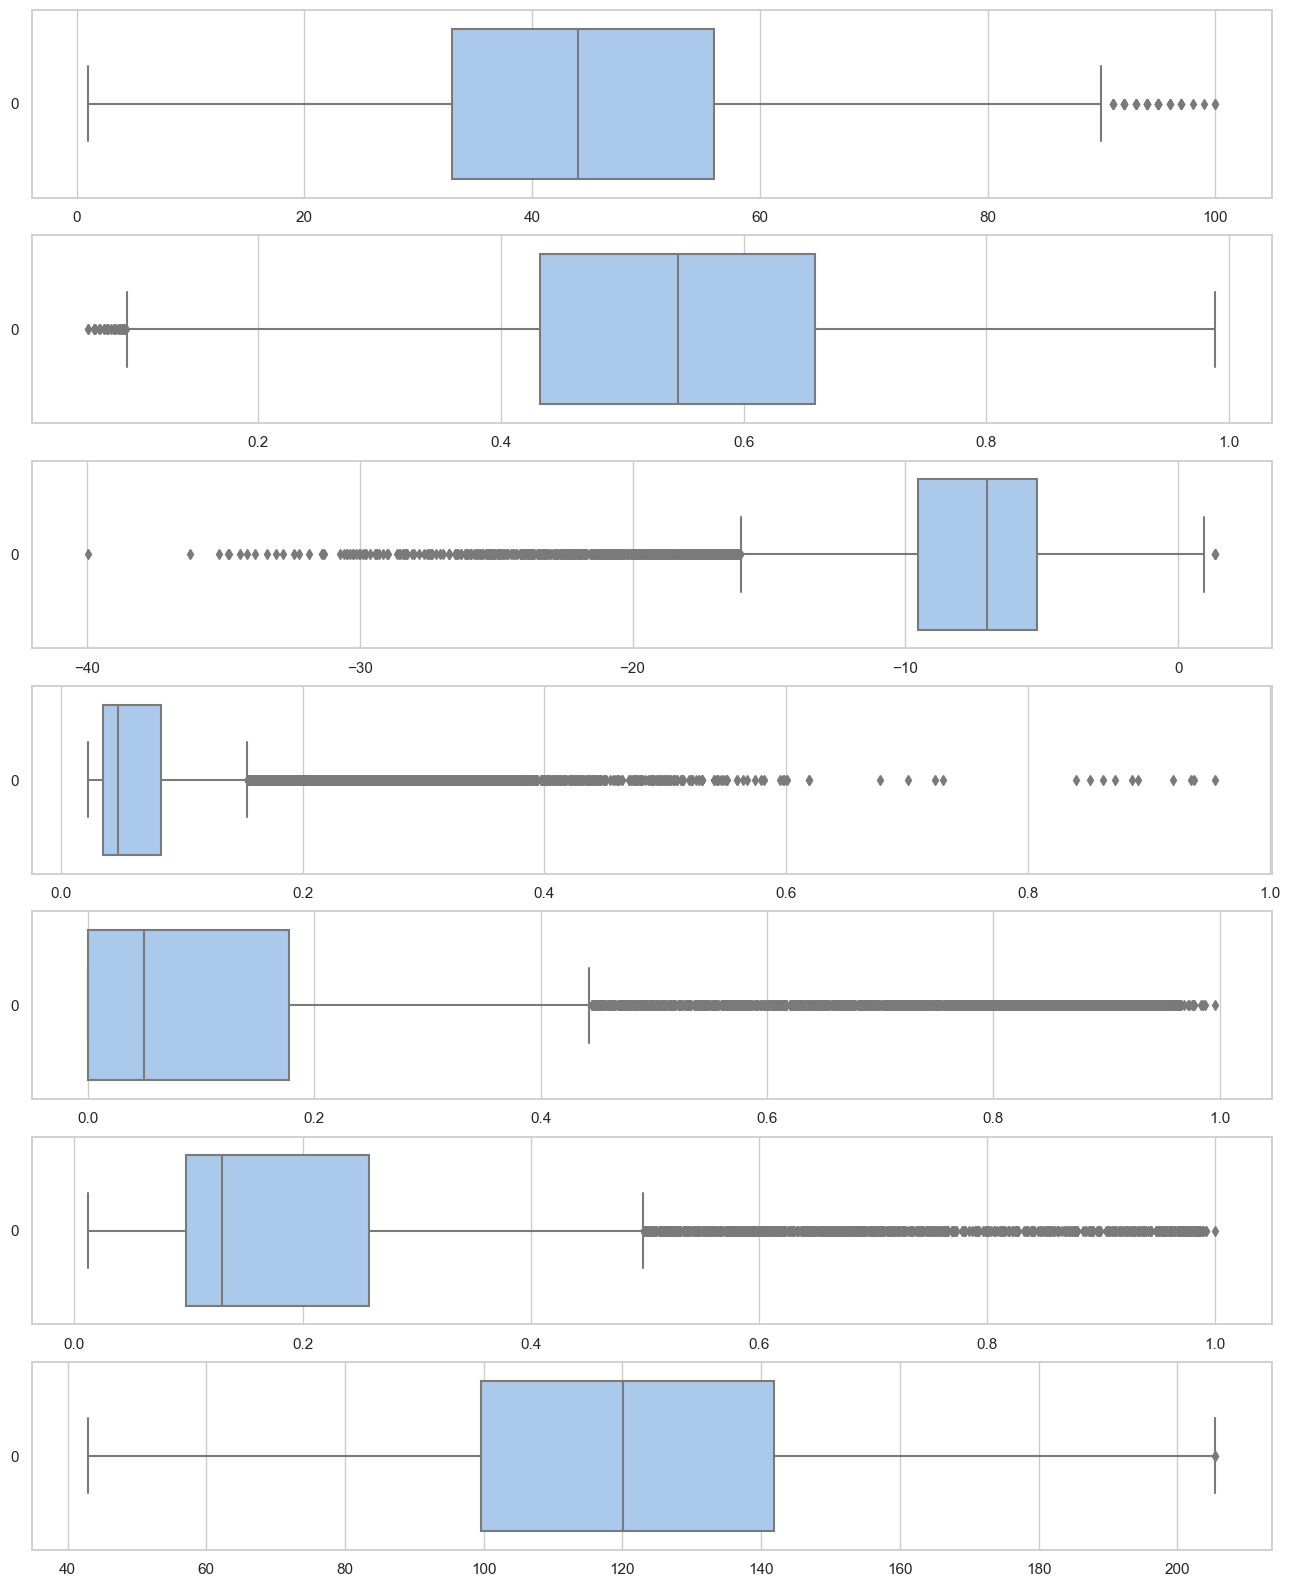

In [56]:
f, axes = plt.subplots(7, figsize=(16, 20))
 
count = 0
for var in cleaned_df:
    sb.boxplot(data = cleaned_df[var], orient = "h", ax = axes[count])
    count += 1

In [ ]:
# to find out the number of outliers in numeric variables
df=pd.DataFrame(musicdata[['Popularity']])
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = (data[(data>upper_bound) | (data<lower_bound)])
    #print( f' {var: >15} number of outliers: {outlier: >5} ')
    # Remove outliers from the DataFrame
    cleaned_df = df.drop(outlier.index)
    # Write the cleaned DataFrame to a new CSV file
    cleaned_df.to_csv('cleaned_file_.csv', index=False)